# Первичный анализ и предобработка данных с Pandas

В этом задании рассмотрим первичный анализ данных на примере реальных данных по шоколадным батончикам. Данные содержат следующие атрибуты: 'company' - компания производитель, 'bar_name' - название шоколадного батончика, 'ref' - номер, 'rew_date' - дата оценки, 'percent' - процент какао бобов, 'company_loc' - местонахождение компании, 'rate' - рейтинг, 'bean_dtype' - тип какао бобов, 'bean_orig' - страна происхождения.

## Численные атрибуты

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
best_bar = pd.read_csv('drive/My Drive/flavors_of_cacao.csv', sep=',', header=0, names=['company', 'bar_name','ref', 'rew_date', 'percent', 'company_loc', 'rate', 'bean_dtype', 'bean_orig'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
type(best_bar)

pandas.core.frame.DataFrame

Оставим только только местонахождение компании, рейтинг, процент какао бобов и страну происхождения для дальнейшего анализа.

In [ ]:
best_bar = best_bar[['company_loc', 'rate', 'percent', 'bean_orig']]
best_bar.head() 

,company_loc,rate,percent,bean_orig
0,France,3.75,63%,Sao Tome
1,France,2.75,70%,Togo
2,France,3.00,70%,Togo
3,France,3.50,70%,Togo
4,France,3.50,70%,Peru


Необходимо построить гистограмму распределения рейтинга батончика через plot(). Количество столбцов гистограммы равно 20.
На одном графике необходимо построить график плотности вероятности, который строится на основе оценки непрерывного распределения вероятности. Гистограммы аппроксимируют комбинацией ядре, т.е. более простых распределений, например нормалього (гауссова). Поэтому графики плотности еще называют ядерной окенки плотности (KDE-kernel density estimate). Строится kde с помощью функции плот с параметром kind='kde'.

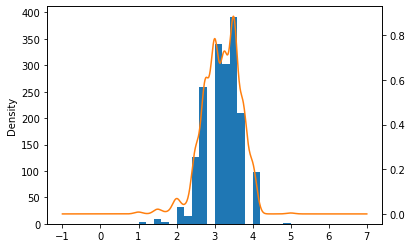

In [ ]:
d = best_bar.rate.plot(kind = 'hist', bins = 20)
best_bar.rate.plot(kind = 'kde', ax=d, secondary_y=True) #Оценка плотности ядра

Необходимо построить гистограмму распределения для процента какао бобов. Однако, следует отметить, что данные атрибут имеет тип object. Гистограмму для такого типа построить не получиться.

In [ ]:
best_bar['percent'] #Невозможно построить гистограмму для типа object. Проверяем его тип.

0       63%
1       70%
2       70%
3       70%
4       70%
       ... 
1790    70%
1791    65%
1792    65%
1793    62%
1794    65%
Name: percent, Length: 1795, dtype: object

Необходимо преобразовать данный тип в float с помощью функции apply. Причем сначала необходимо убрать знак '%' в конце каждого элемента, а затем преобразовать в тип данных с плавающей точкой. Функция apply проходит по всем значениям данных и применяет указанную функцию.

In [ ]:
best_bar.percent = best_bar.percent.apply(lambda x:float(x[:-1]))
best_bar['percent']

0       63.0
1       70.0
2       70.0
3       70.0
4       70.0
        ... 
1790    70.0
1791    65.0
1792    65.0
1793    62.0
1794    65.0
Name: percent, Length: 1795, dtype: float64

Теперь построим гистограмму распределения для процента какао бобов.

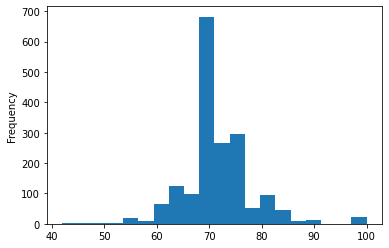

In [ ]:
bob = best_bar.percent.plot(kind = 'hist', bins = 20)

Постройте scatter plot зависимости рейтинга батончика от процента какао бобов, используя метод plot для Pandas DataFrame с аргументом kind='scatter'. Подпишите картинку.

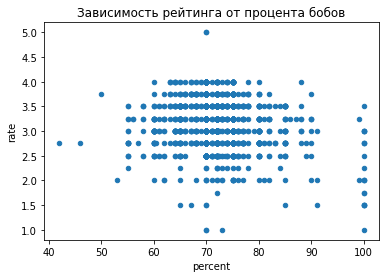

In [ ]:
d1 = best_bar.plot(x='percent',y = 'rate', kind = 'scatter').set_title('Зависимость рейтинга от процента бобов')

Постройте "ящик с усами" для числовых распределений с помощью функции boxplot. Возпользуйтесь также функцией describe() для каждого распределения.

count    1795.000000
mean        3.185933
std         0.478062
min         1.000000
25%         2.875000
50%         3.250000
75%         3.500000
max         5.000000
Name: rate, dtype: float64

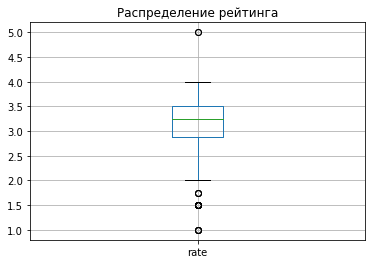

In [ ]:
best_bar.boxplot(column ='rate').set_title('Распределение рейтинга')
best_bar.rate.describe()

count    1795.000000
mean       71.698329
std         6.323118
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       100.000000
Name: percent, dtype: float64

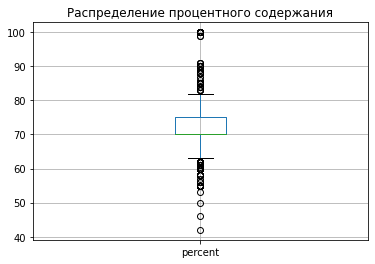

In [ ]:
best_bar.boxplot(column ='percent').set_title('Распределение процентного содержания')
best_bar.percent.describe()

## Категориальные атрибуты

Обратим внимание на категориальные признаки. Построить гистограмму распределения не удасться, но в качестве начального анализа можно воспользоваться функцией value_counts, которая позволяет вывести количество встречающихся значений в атрибуте данных. Обратите внимание внимание на места происхождения бобов, которые редко встречаются в наборе данных. Для вывода начальных и конечных элементов используются функции head() и tail() соответственно.

Как можно видеть, среди данных присутствуют смешанные компоненты и ошибки в написании.

In [ ]:
Count_bean_orig = best_bar.bean_orig.value_counts() #Происхождение бобов (Вызывать начальные или конечные элементы бессмысленно)
Count_bean_orig

Venezuela                   214
Ecuador                     193
Peru                        165
Madagascar                  145
Dominican Republic          141
                           ... 
Peru, Dom. Rep                1
Burma                         1
Peru, Ecuador, Venezuela      1
Ven., Indonesia, Ecuad.       1
Peru, Belize                  1
Name: bean_orig, Length: 100, dtype: int64

In [ ]:
Count_company_loc = best_bar.company_loc.value_counts() #Происхождение батончиков
Count_company_loc

U.S.A.               764
France               156
Canada               125
U.K.                  96
Italy                 63
Ecuador               54
Australia             49
Belgium               40
Switzerland           38
Germany               35
Austria               26
Spain                 25
Colombia              23
Hungary               22
Venezuela             20
Brazil                17
Peru                  17
Japan                 17
New Zealand           17
Madagascar            17
Denmark               15
Vietnam               11
Guatemala             10
Scotland              10
Costa Rica             9
Argentina              9
Israel                 9
Poland                 8
Honduras               6
Lithuania              6
Nicaragua              5
Sweden                 5
South Korea            5
Domincan Republic      5
Puerto Rico            4
Amsterdam              4
Netherlands            4
Mexico                 4
Fiji                   4
Ireland                4


После того, как выведено количество уникальных значений можно представить их визуальное распределение с помощью функции plot(kind='bar').

Text(0.5, 1.0, 'Происхождение батончиков')

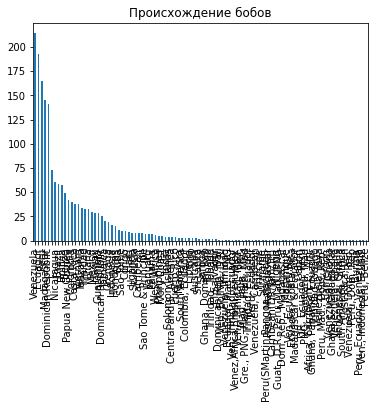

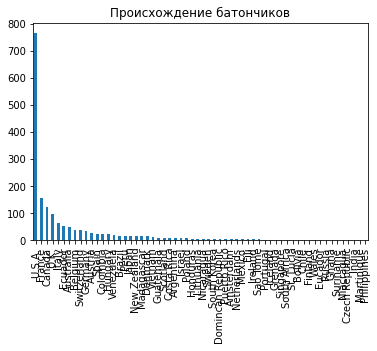

In [ ]:

Count_bean_orig.plot(kind='bar').set_title('Происхождение бобов')
plt.figure();
Count_company_loc.plot(kind='bar').set_title('Происхождение батончиков')

По гистограмме распределения категориальных атрибутов о происхождения какао бобов можно увидеть, что присутствует хаос в данных. Для некоторых объектов названия мест происхождения написаны с ошибками, у некоторых объектов вообще отсутствует место происхождения, а так же есть батончики, состоящие из какао бобов из разных мест происхождения. В этой связи необходимо произвести предобработку данных для дальнейшего анализа.
Для начала убрать объекты с пропущенными записями, используя функцию dropna. Необходимо отметить, что в качестве параметров функции передается 'axis', где 0 - удалять по строкам (объектам), 1 - удалять по столбцам, 'how', где 'any' - удалять строку или столбец, если есть пустой объект, 'all' - удалять строку или столбец, если все объекты пустые.  

In [ ]:
try_drop = best_bar.dropna(axis =0, how = 'any')
try_drop

,company_loc,rate,percent,bean_orig
0,France,3.75,63.0,Sao Tome
1,France,2.75,70.0,Togo
2,France,3.00,70.0,Togo
3,France,3.50,70.0,Togo
4,France,3.50,70.0,Peru
...,...,...,...,...
1790,Austria,3.75,70.0,Peru
1791,Austria,3.00,65.0,Congo
1792,Austria,3.50,65.0,India
1793,Austria,3.25,62.0,India


Заметим, что пустые записи из атрибута происхождения бобов не удалилсь. Значит "пустые" записи не являются пустыми. Выведите все уникальные значения атрибута 'bean_orig' с помощью функции unique() и найдите значение пустой записи.

In [ ]:
try_drop['bean_orig'].unique() #Находим пустую запись \xa0

array(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama',
       'Madagascar', 'Brazil', 'Ecuador', 'Colombia', 'Burma',
       'Papua New Guinea', 'Bolivia', 'Fiji', 'Mexico', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Tanzania',
       'Dominican Republic', 'Ghana', 'Belize', '\xa0', 'Jamaica',
       'Grenada', 'Guatemala', 'Honduras', 'Costa Rica',
       'Domincan Republic', 'Haiti', 'Congo', 'Philippines', 'Malaysia',
       'Dominican Rep., Bali', 'Venez,Africa,Brasil,Peru,Mex', 'Gabon',
       'Ivory Coast', 'Carribean', 'Sri Lanka', 'Puerto Rico', 'Uganda',
       'Martinique', 'Sao Tome & Principe', 'Vanuatu', 'Australia',
       'Liberia', 'Ecuador, Costa Rica', 'West Africa', 'Hawaii',
       'St. Lucia', 'Cost Rica, Ven', 'Peru, Madagascar',
       'Venezuela, Trinidad', 'Trinidad, Tobago',
       'Ven, Trinidad, Ecuador', 'South America, Africa', 'India',
       'Africa, Carribean, C. Am.', 'Tobago', 'Ven., Indonesia, Ecuad.',
       'Trinidad-Tobago

Для того, чтобы исключить данный элемент, необходимо использовать слудующую конструкцию: best_bar['bean_orig'] != 'element value', которая вернет бинарный массив элементов, где True - атрибут объекта не принимает значение 'element value', False - атрибут объекта принимает значение 'element value'. Затем полученную бинарную матрицу передаем в качестве маски, по которой будут выбраны объекты из нашего массива данных.

In [ ]:
mask = try_drop['bean_orig'] != '\xa0'
new_best_bar = try_drop[mask]
new_best_bar #Массив пропущен через маску

,company_loc,rate,percent,bean_orig
0,France,3.75,63.0,Sao Tome
1,France,2.75,70.0,Togo
2,France,3.00,70.0,Togo
3,France,3.50,70.0,Togo
4,France,3.50,70.0,Peru
...,...,...,...,...
1790,Austria,3.75,70.0,Peru
1791,Austria,3.00,65.0,Congo
1792,Austria,3.50,65.0,India
1793,Austria,3.25,62.0,India


Помимо этого необходимо решить проблему с батончиками из разных какао бобов. Лучшим способом является обработка и разделение этих составных бобов. Но на данном этапе, в виду их малого вклада, мы уберем их и сделаем одним видом сложного состава 'complex'. Будем считать редковстречающимися, если в выборке их не более 5.

In [ ]:
condition = new_best_bar['bean_orig'].value_counts() <= 5 #Булевая маска для элементов < 5
def change_line(bar):      #Метод для применения условия
    return condition[bar]
mask_small_count = new_best_bar['bean_orig'].apply(change_line)    #Применяем для каждой строки данное условие
change_best_bar = new_best_bar['bean_orig'].mask(mask_small_count, 'complex') #Заменяем по маске все элементы на complex
new_best_bar=new_best_bar.assign(bean_orig = change_best_bar) #Добавление измененного столбца к остальным
new_best_bar

,company_loc,rate,percent,bean_orig
0,France,3.75,63.0,Sao Tome
1,France,2.75,70.0,complex
2,France,3.00,70.0,complex
3,France,3.50,70.0,complex
4,France,3.50,70.0,Peru
...,...,...,...,...
1790,Austria,3.75,70.0,Peru
1791,Austria,3.00,65.0,Congo
1792,Austria,3.50,65.0,complex
1793,Austria,3.25,62.0,complex


Постройте круговую гистограмму распределения для стран происзводителей какао бобов с помощью функции pie().

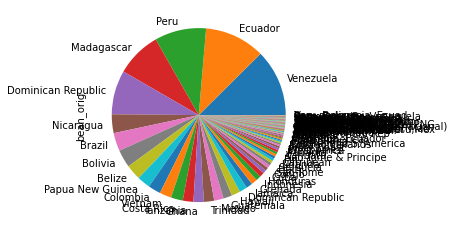

In [ ]:
new_best_bar.bean_orig.value_counts().plot(kind='pie')

## Попарные графики распределений

In [ ]:
from sklearn import preprocessing
from seaborn import pairplot

Построить попарные распределения для всех признаков.

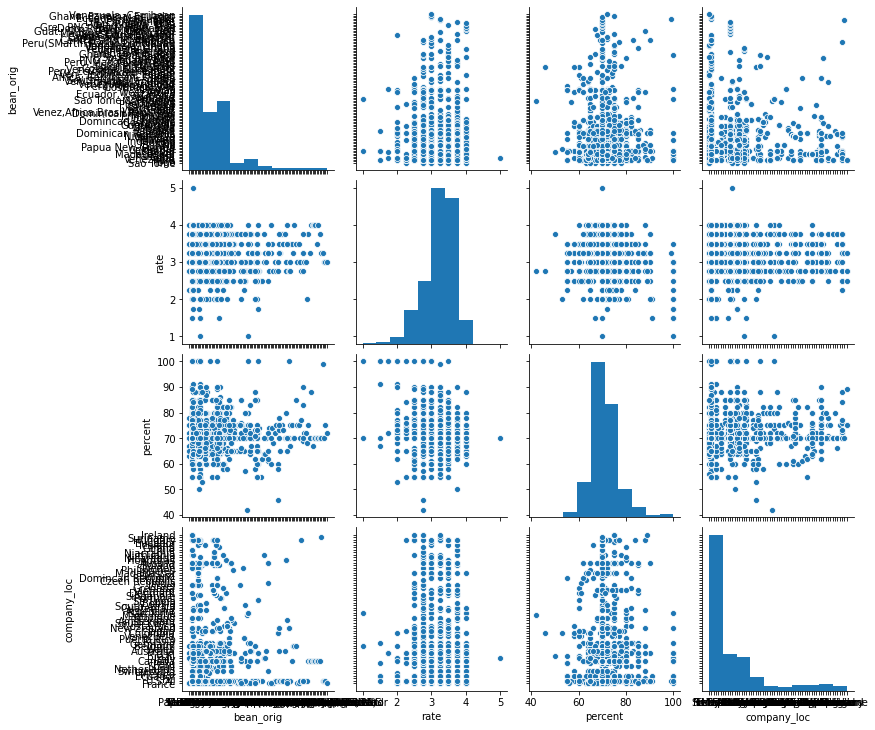

In [ ]:
pairplot(new_best_bar, vars=['bean_orig', 'rate', 'percent', 'company_loc'])

Определите, где растут лучшие какао бобы, вычислив средний значение и медиану рейтинга батончика для каждого места происхождения. Напишите первую тройку лучших в обоих случаях.

In [ ]:
new_best_bar.tail(1000) #Использовалось для проверки правильности изменения данных на complex

,company_loc,rate,percent,bean_orig
745,Italy,3.00,64.0,Ghana
746,Italy,3.00,64.0,complex
747,Italy,3.00,76.0,Venezuela
748,Italy,3.25,64.0,complex
750,U.S.A.,2.75,65.0,Haiti
...,...,...,...,...
1790,Austria,3.75,70.0,Peru
1791,Austria,3.00,65.0,Congo
1792,Austria,3.50,65.0,complex
1793,Austria,3.25,62.0,complex


In [ ]:
mean_rate_bob = new_best_bar.groupby(['bean_orig']).mean() #Среднее значение
mean_rate_bob.sort_values(by='rate', ascending=False).head(3) #Сортировка по убыванию и вывод ТОП-3 страны

,rate,percent
bean_orig,,
Haiti,3.388889,71.333333
Honduras,3.350000,73.933333
Congo,3.325000,70.500000


In [ ]:
mean_rate_bob1 = new_best_bar.groupby(['bean_orig']).median() #Медиана
mean_rate_bob1.sort_values(by='rate', ascending=False).head(3)

,rate,percent
bean_orig,,
Honduras,3.500,72.0
Sao Tome & Principe,3.500,75.0
Brazil,3.375,70.0


Определите, где производят лучшие батончики, вычислив средний значение и медиану рейтинга батончика для каждого места происхождения.

In [ ]:
mean_rate_production = new_best_bar.groupby(['company_loc']).mean()
mean_rate_production.sort_values(by='rate', ascending=False).head(3)

,rate,percent
company_loc,,
Chile,3.75,70.00
Amsterdam,3.50,73.25
Netherlands,3.50,70.00


In [ ]:
mean_rate_production1 = new_best_bar.groupby(['company_loc']).median()
mean_rate_production1.sort_values(by='rate', ascending=False).head(3)

,rate,percent
company_loc,,
Chile,3.75,70.0
Amsterdam,3.50,72.5
Iceland,3.50,70.0
